# Übung 4

### Themen: Lineare Regression, Gradientenverfahren

## Aufgabe 1

Man betrachte die Funktion $f(x)=x^2$, die bekanntermaßen in $x=0$ ein Minimum besitzt. 

a) Formulieren Sie das Gradientenverfahren für diese Funktion unter Verwendung des Startwerts $x^0=1$ und der Lernrate $\alpha$. 

b) Berechnen Sie für $\alpha=1$ die ersten vier Iterierten. Was fällt auf?

c) Wiederholen Sie Teilaufgabe b) für $\alpha=0.5$ und für $\alpha=0.25$.

## Aufgabe 2

In dieser Aufgabe wollen wir uns mit dem Gradientenverfahren zur approximativen Berechnung der Parameter für ein Lineares Regressionsmodell unter Verwendung des Least-Squares-Ansatzes befassen. Wir betrachten dazu den Boston-Housing-Datensatz, der Zensus-Daten aus der Region von Boston, Massachussets, enthält.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Einlesen des Datensatzes:

In [184]:
df = pd.read_csv('boston_housing.csv',sep=',')

In [185]:
df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Bedeutung der Spalten des Datensatzes:

<pre>
1. zn        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
2. indus     proportion of non-retail business acres per town
3. chas      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
4. nox       nitric oxides concentration (parts per 10 million)
5. rm        average number of rooms per dwelling
6. age       proportion of owner-occupied units built prior to 1940
7. dis       weighted distances to five Boston employment centres
8. rad       index of accessibility to radial highways
9. tax      full-value property-tax rate per $10,000
10. ptratio  pupil-teacher ratio by town
11. black    1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
12. lstat    % lower status of the population
13. medv     Median value of owner-occupied homes in $1000s
</pre>

#### a) Visualisierung 

Im Folgenden soll ein univariates lineares Regressionsmodell hergeleitet werden, um die Zielvariable `medv` vorherzusagen. Um zu beurteilen, welche Größen als unabhängige Variable für eine lineare Modellierung in Frage kommen, sollen jeweils zwei Größen des Datensatzes in Form eines Streudiagramms gegeneinander aufgetragen werden. Dies kann durch die Funktion `pairplot` aus der Bibliothek seaborn erreicht werden.

Führen Sie die folgende Zelle aus, um die Pairplots zu erstellen. Welche Eingangsgrößen kommen aus Ihrer Sicht zur Erstellung eines univariaten linearen Regressionsmodells zur Vorhersage von `medv` in Frage?

rm und lstat. rm korreliert positiv, lstat negativ. 

import seaborn as sns
cols = ['lstat', 'indus', 'nox', 'rm', 'medv']
sns.pairplot(df, height=3)

#### b) Parameterschätzung mit Scikit-learn

Im Folgenden soll ein univariates Lineares Regressionsmodell der Gestalt $$y=\theta_0+\theta_1x$$ zur Vorhersage von `medv` in Abhängigkeit der Größe `rm` erstellt werden. Schätzen Sie dazu anhand des obigen Datensatzes die Parameter $\vec{\theta}=(\theta_0,\theta_1)$ unter Verwendung von Scikit-learn. Visualisieren Sie die resultierende Gerade zusammen mit den Datenpunkten in einem Diagramm. <br>
Hinweis: die Parameter $\theta_0$ und $\theta_1$ werden in der Klasse `LinearRegression` in den Attributen `intercept_` und `coef_` gespeichert.

In [187]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [188]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()


In [189]:
X = df['rm']
y = df['medv']
X = X.to_numpy()
y = y.to_numpy()

X = X.reshape(-1,1)
y = y.reshape(-1,1)

#scale
X = scale.fit_transform(X) 

reg = LinearRegression().fit(X, y)
pred_y = reg.predict(X)
#inv scale
X = scale.inverse_transform(X)


print(reg.coef_[0][0])
print(reg.intercept_[0])

6.388975221817343
22.532806324110677


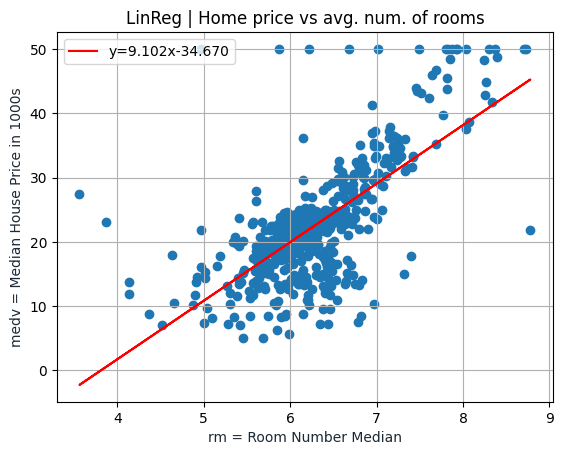

In [190]:
polynomial = reg.coef_[0][0]*X+reg.intercept_[0]
plt.plot(X, pred_y, '-r', label='y=9.102x-34.670')
plt.scatter(X,y)
plt.title('LinReg | Home price vs avg. num. of rooms')
plt.xlabel('rm = Room Number Median', color='#1C2833')
plt.ylabel('medv = Median House Price in 1000s', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### c) Parameterschätzung mit Hilfe des Gradientenverfahrens

Implementieren Sie das Gradientenverfahren für die univariate lineare Regression gemäß der aus der Vorlesung bekannten Iterationsvorschrift $$\vec{\theta}^k = \vec{\theta}^{k-1}-\frac{\alpha}{m}(X^TX\vec{\theta}^{k-1}-X^T\vec{y})~.$$
Dabei sei $m$ die Anzahl der Samples im Trainingsdatensatz und $\alpha$ die Lernrate. Verwenden Sie den Startwert $\vec{\theta}^0=(0,0)$ und als Abbruchkriterium die Bedingung
$$\|\vec{\theta}-\vec{\theta}^k\|<10^{-5}~,$$
wobei $\vec{\theta}$ die in Teilaufgabe b) mit Scikit-learn ermittelten Parameter bezeichne.<br><br>
Testen Sie Ihre Implementierung unter Verwendung der Lernrate $\alpha=0.02$. Wie viele Iterationen werden durchgeführt, bevor das Abbruchkriterium erreicht wird? Wiederholen Sie das Experiment für verschiedene (kleinere und größere) Werte für die Lernrate $\alpha$. <br><br>
Hinweis: die Länge eines Vektors (1D-Array) kann mit Hilfe der Funktion `numpy.linalg.norm` berechnet werden.

coef: [0.69535995] intercept: 0


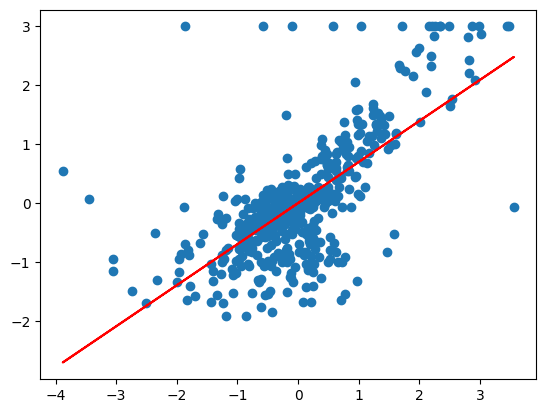

In [256]:
X = df['rm']
y = df['medv']
X = X.to_numpy()
y = y.to_numpy()

#data
X = X.reshape(-1,1)
y = y.reshape(-1,1)

X = scale.fit_transform(X) 
y = scale.fit_transform(y) 

#theta 0 and 1
coef = 0.0
intercept = 0.0
#hyperparam
#Attention!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! THE LEARNING RATE MASSIVELY AFFECTS OVERSHOOTING
#AND CAUSES RIDICULOUSLY HIGH VALUES
lr = 0.2

for i in range(100):
    y_pred = coef*X+intercept
    pd_intercept = (1/506) * sum(y_pred - y)
    pd_coef = (1/506) * sum((y_pred - y) * X)
    
    intercept = intercept - lr * pd_intercept
    coef = coef - lr * pd_coef
print("coef:",coef,"intercept:",int(intercept))
plt.scatter(X,y)
plt.plot(X, y_pred, '-r', label='y=9.102x-34.670')

#### d) Einfluss von Standardisierung auf die Konvergenzgeschwindigkeit des Gradientenverfahrens

Wiederholen Sie die Teilaufgaben b) und c) und standardisieren Sie nun vorher die Spalten `medv` und `rm`. Sie können dazu entweder den StandardScaler aus `sklearn.preprocessing` verwenden oder die Standardisierung "manuell" gemäß der in der Vorlesung besprochenen Vorschrift durchführen. Wie viele Iterationen sind bei einer Lernrate von $\alpha=0.02$ jetzt nötig, um das Abbruchkriterium $$\|\vec{\theta}-\vec{\theta}^k\|<10^{-5}$$ zu erreichen? Testen Sie, wie weit Sie die Lernrate erhöhen können, bis das Verfahren nicht mehr konvergiert.

#### e) Eigenschaften der Least-Squares-Lösung

Offenbar war der Parameter $\theta_0$ in Teilaufgabe d) gleich Null. Begründen Sie dies mathematisch.

wegen standardisierung